In [31]:
# Step 1: Import essential libraries
import pandas as pd    # For handling data
import numpy as np     # For calculations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For nice charts


In [32]:
# Step 2: Load the dataset
df = pd.read_csv("creditcard.csv")  # Make sure this file is in the same folder

# See the first 5 rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
# Step 3: Check basic info
df.info()  # See number of rows, columns, and data types

# Check if any missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [34]:
# Step 5: Explore target variable distribution
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

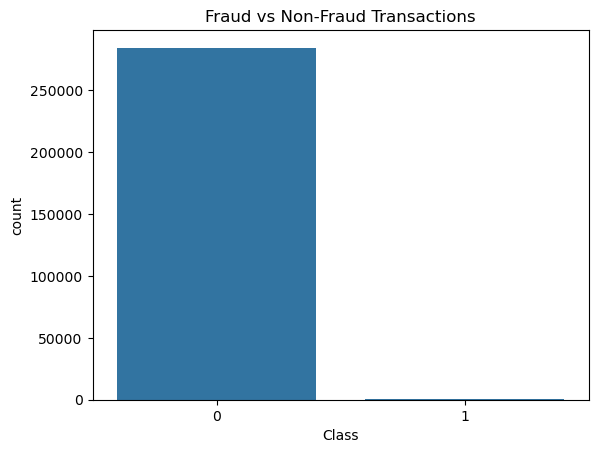

In [35]:
# Step 6: Plot fraud vs non-fraud distribution
sns.countplot(x="Class", data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


In [36]:
# Step 7: Compare transaction amounts for Fraud vs Non-Fraud
fraud_amount = df[df['Class'] == 1]['Amount'].sum()
nonfraud_amount = df[df['Class'] == 0]['Amount'].sum()

print("💰 Total Fraud Transaction Amount:", fraud_amount)
print("💵 Total Non-Fraud Transaction Amount:", nonfraud_amount)


💰 Total Fraud Transaction Amount: 60127.97
💵 Total Non-Fraud Transaction Amount: 25102462.04


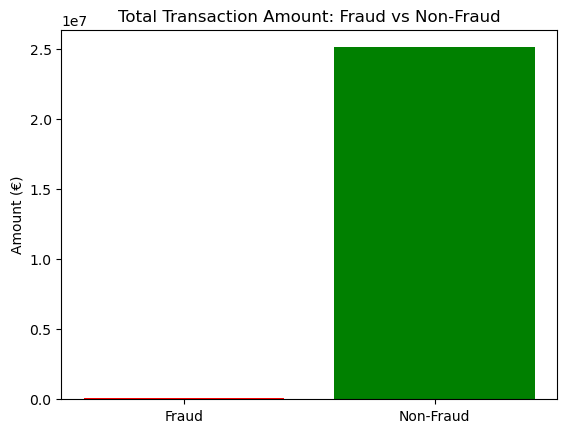

In [37]:
# Step 8: Bar chart for fraud vs non-fraud transaction amounts

amounts = [fraud_amount, nonfraud_amount]
labels = ["Fraud", "Non-Fraud"]

plt.bar(labels, amounts, color=["red", "green"])
plt.title("Total Transaction Amount: Fraud vs Non-Fraud")
plt.ylabel("Amount (€)")
plt.show()


In [38]:
# Step 9: Compare average transaction amount in fraud vs non-fraud
print("Average Fraud Amount:", df[df['Class']==1]['Amount'].mean())
print("Average Non-Fraud Amount:", df[df['Class']==0]['Amount'].mean())


Average Fraud Amount: 122.21132113821139
Average Non-Fraud Amount: 88.29102242231328


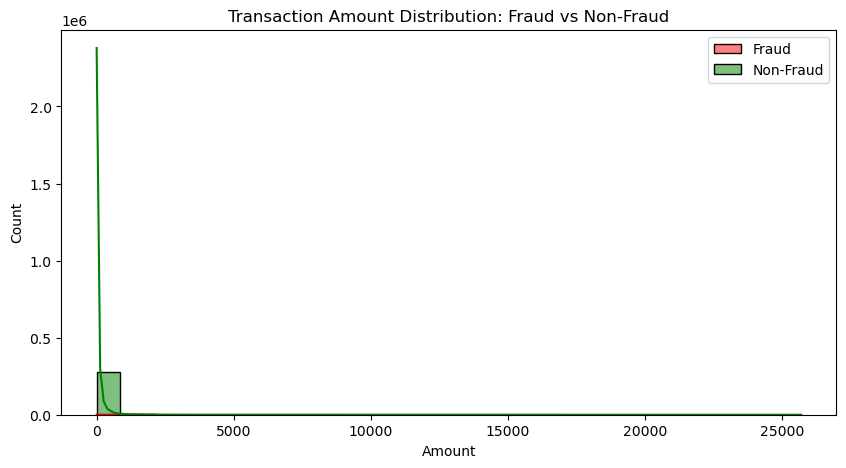

In [47]:
# Step 10: Plot amount distribution for fraud vs non-fraud
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class']==1]['Amount'], bins=30, color="red", label="Fraud", kde=True)
sns.histplot(df[df['Class']==0]['Amount'], bins=30, color="green", label="Non-Fraud", kde=True)
plt.legend()
plt.title("Transaction Amount Distribution: Fraud vs Non-Fraud")
plt.show()


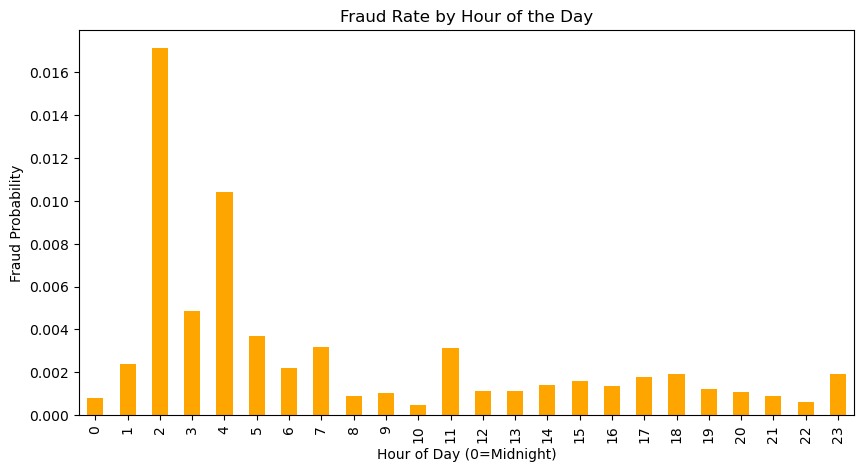

In [49]:
# Step 11: Create 'Hour' column
# Safer conversion: integer division (//)
df['Hour'] = ((df['Time'] // 3600) % 24).astype(int)

# Average fraud rate by hour
fraud_by_hour = df.groupby('Hour')['Class'].mean()

plt.figure(figsize=(10,5))
fraud_by_hour.plot(kind='bar', color="orange")
plt.title("Fraud Rate by Hour of the Day")
plt.ylabel("Fraud Probability")
plt.xlabel("Hour of Day (0=Midnight)")
plt.show()



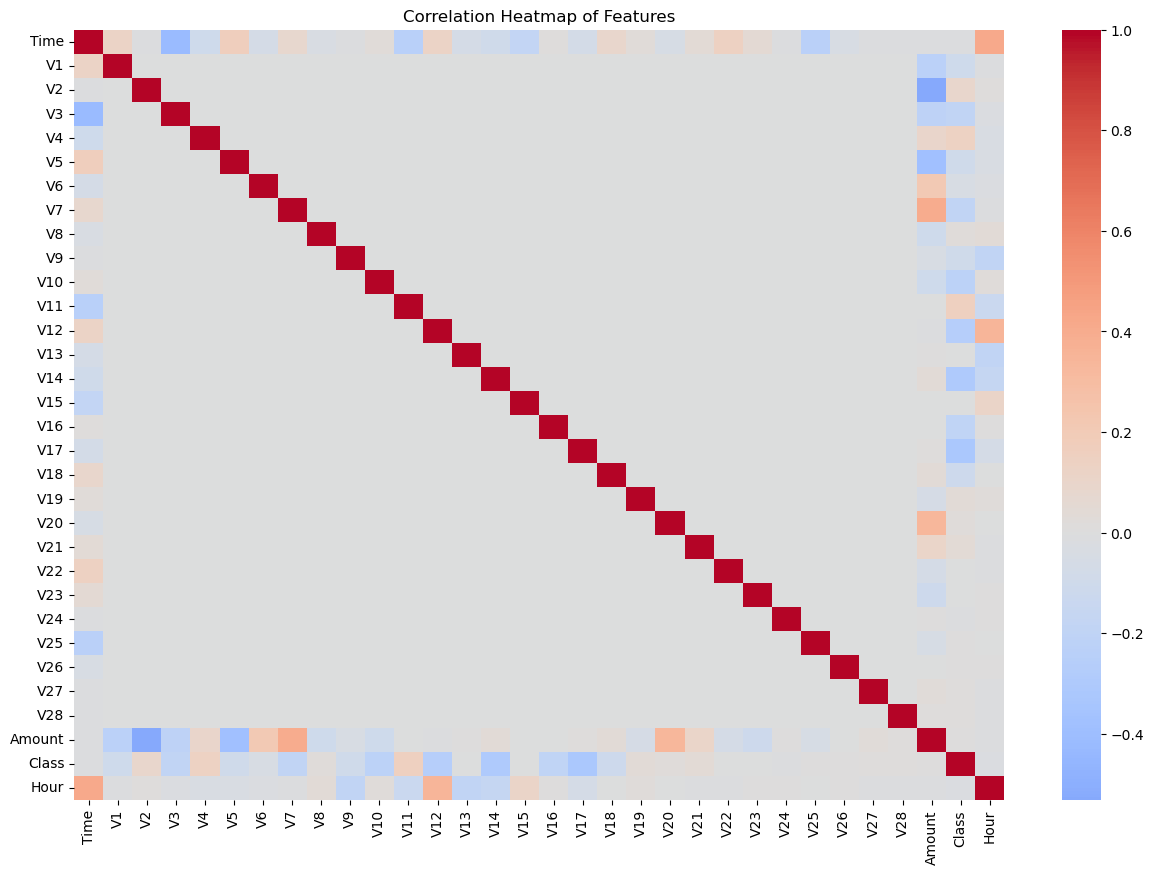

In [51]:
import seaborn as sns

# Step 12: Correlation heatmap
plt.figure(figsize=(15,10))
corr = df.corr()

sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features")
plt.show()


## SMOT Technique

In [54]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 6.1: Scale the 'Amount' column
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])

# Optional: scale Time too
df['Time_Scaled'] = scaler.fit_transform(df[['Time']])

# Step 6.2: Define features (X) and target (y)
X = df.drop(['Class', 'Amount', 'Time'], axis=1)
y = df['Class']

# Step 6.3: Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_resampled.value_counts())


Before SMOTE: Class
0    284315
1       492
Name: count, dtype: int64
After SMOTE: Class
0    284315
1    284315
Name: count, dtype: int64


In [56]:
from sklearn.model_selection import train_test_split

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (398041, 31)
Testing set size: (170589, 31)


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 8.1: Initialize model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Step 8.2: Train the model
log_reg.fit(X_train, y_train)

# Step 8.3: Predictions
y_pred = log_reg.predict(X_test)

# Step 8.4: Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[83103  2192]
 [ 6456 78838]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     85295
           1       0.97      0.92      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



In [60]:
from sklearn.ensemble import RandomForestClassifier

# Step 9.1: Initialize model
rf_model = RandomForestClassifier(
    n_estimators=100,   # number of trees
    random_state=42,
    n_jobs=-1,          # use all CPU cores for speed
    class_weight="balanced"  # handle class imbalance (even though SMOTE was applied)
)

# Step 9.2: Train the model
rf_model.fit(X_train, y_train)

# Step 9.3: Predictions
y_pred_rf = rf_model.predict(X_test)

# Step 9.4: Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Confusion Matrix:
 [[85274    21]
 [    0 85294]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



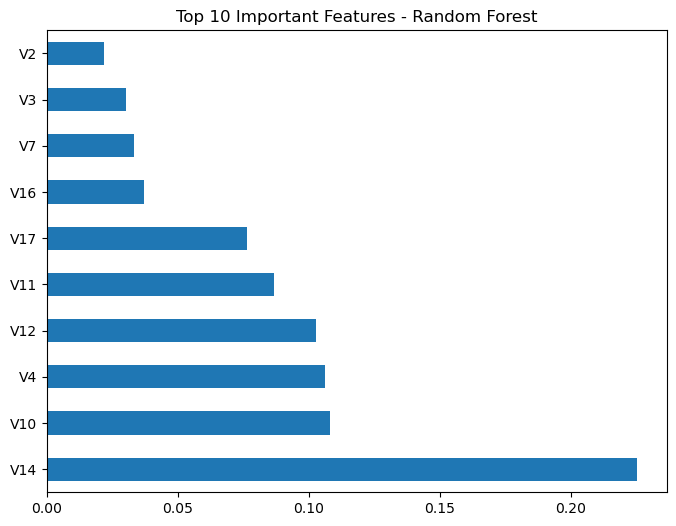

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort and plot
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Important Features - Random Forest")
plt.show()


In [68]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 11.1: Initialize model
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=1   # since we already used SMOTE
)

# Step 11.2: Train
xgb_model.fit(X_train, y_train)

# Step 11.3: Predict
y_pred_xgb = xgb_model.predict(X_test)

# Step 11.4: Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Confusion Matrix:
 [[85203    92]
 [    0 85294]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [70]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate model
def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

# Collect results
results = []
results.append(evaluate_model("Logistic Regression", y_test, y_pred))
results.append(evaluate_model("Random Forest", y_test, y_pred_rf))
results.append(evaluate_model("XGBoost", y_test, y_pred_xgb))

# Create DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.949305   0.972948  0.924309  0.948005
1        Random Forest  0.999877   0.999754  1.000000  0.999877
2              XGBoost  0.999461   0.998923  1.000000  0.999461
